In [4]:
import numpy as np
import matplotlib.pyplot as plt
import enzyme_utils_hpw as utils
import seaborn as sns
from scipy import stats
# import msdanalyzer as msd

### In this notebook, we want to analyze the whole buffer dataset using the analytical form of the bm model

In [2]:
dir_ = 'new_data/transformed_buffer/'
dx, dy, dt, track_info, lookup, track_id = utils.loadRawMinData(dir_, min_length=5, isDx=True)
# x, y, t, track_info2, lookup2, track_id2 = utils.loadRawMinData(dir_, min_length=5, isDx=False)

Total 15 files read; Total 813 trajectories (length >= 5) loaded; Total 23096 data points


Text(0, 0.5, 'counts')

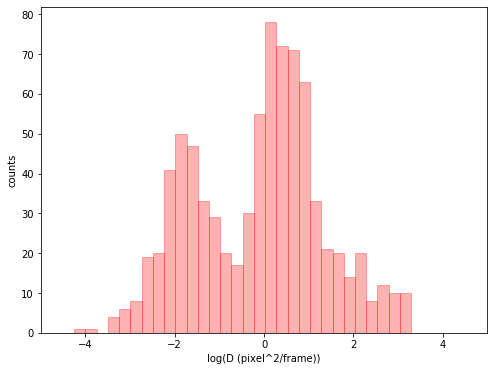

In [6]:
a, b = 0.25, 0.2
map_estimator = np.zeros((len(track_info), ))
for i in range(len(track_info)): 
    sdx, sdy, sdt = utils.loadSelectTraj(dx, dy, dt, track_info, i, True)
    map_estimator[i] = utils.MAP_bm(sdx, sdy, sdt, a, b)

x = np.linspace(np.log(-4), np.log(4), 1000)
plt.figure(figsize=(8, 6))
sns.distplot(np.log(map_estimator), hist = True, bins=30, kde = False, label='buffer',
kde_kws = {'linewidth': 3, 'color':'b'}, hist_kws={'alpha':0.3, 'color':'r', 'edgecolor':'r', 'label':'buffer dataset'})
plt.xlim(-5, 5)
plt.xlabel('log(D (pixel^2/frame))')
plt.ylabel('counts')

In [7]:
def draw_semilog_posterior(D, alpha, beta, xpos, ypos, ax, max_):
    posterior = stats.invgamma.pdf(D, alpha, scale=beta)
    posterior /= posterior.max() 
    hd_region = np.where(np.log10(posterior) >= -2)
    ax.plot(xpos, max_, '.', c='r', markersize=4)
    return ax.plot(posterior[hd_region]+xpos,np.log(D[hd_region]), c='b', alpha=0.2)

In [8]:
ind = [i for i in range(len(track_info))]
dtype = [('log_d', float), ('index', int)]
order = 'log_d'
utils.sort_by_entry([map_estimator, ind], dtype, order)

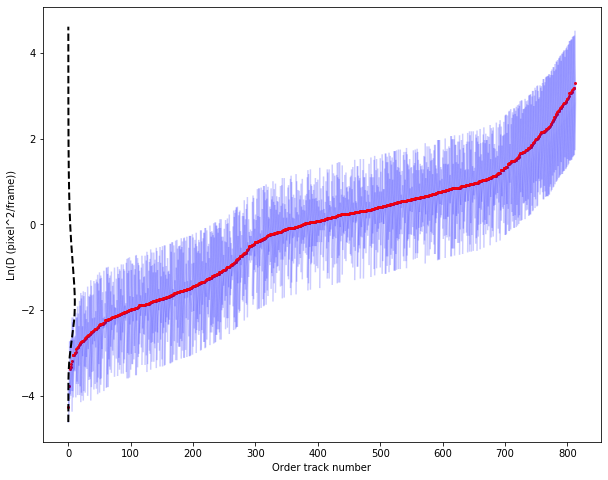

In [10]:
a, b = 0.25, 0.2
fig, ax = plt.subplots(figsize=(10, 8))
D = np.logspace(-2,2,500)
for i in range(len(track_info)):
    sdx, sdy, sdt = utils.loadSelectTraj(dx, dy, dt, track_info, ind[i], True)
    alpha = len(sdx) + a
    beta = np.sum((sdx**2 + sdy**2) / 4 / sdt) + b
    draw_semilog_posterior(D, alpha, beta, i, i, ax=ax, max_=np.log(map_estimator[i]))
prior = stats.invgamma.pdf(D, a, scale=b)
ax.plot((prior*20+0), np.log(D), c='k', lw=2, ls='--')
plt.xlabel('Order track number')
plt.ylabel('Ln(D (pixel^2/frame))');